In [ ]:
### Network Parameters

In [104]:
from keras import regularizers
from tensorflow.keras.layers import Input, Dense, Flatten

inp = Input(shape=(10,10))
x = Flatten()(inp)
x = Dense(1000,activation='tanh')(x)
x = Dense(817,activation='tanh')(x)
out = Dense(100)(x)
model = Model(inputs=inp,outputs=out)
model.summary()

Model: "functional_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_129 (InputLayer)       [(None, 10, 10)]          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_393 (Dense)            (None, 1000)              101000    
_________________________________________________________________
dense_394 (Dense)            (None, 817)               817817    
_________________________________________________________________
dense_395 (Dense)            (None, 100)               81800     
Total params: 1,000,617
Trainable params: 1,000,617
Non-trainable params: 0
_________________________________________________________________


### ODE custom loss

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

In [21]:
# The network
inp = Input(shape=(1,))
x = Dense(100,activation='tanh')(inp)
x = Dense(100,activation='tanh')(x)
out = Dense(1)(x)
model = Model(inputs=inp,outputs=out)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [41]:
optimizer = tf.keras.optimizers.Adam(1e-4)


#@tf.function
def train_step(train_data,verbose=True):
    x = tf.Variable(train_data)
    with tf.GradientTape() as t3:
        with tf.GradientTape() as t2:
            with tf.GradientTape() as t1:
                u = model(x,training=True)
            du_dx=t1.gradient(u,x)
        d2u_dx=t2.gradient(du_dx,x)
        loss = (d2u_dx+u**2)**2
    gradients_of_nn = t3.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(gradients_of_nn, model.trainable_variables))
    if verbose==True:
        print(np.mean(loss))

In [47]:
def train(epochs,print_every=100,alpha=1):
    train_data=np.random.normal(0,1,size=(100,1))
    for i, t in enumerate(train_data):
        if t > 1 or t < -1:
            new_value = np.random.normal(0,1,1)
            while new_value > 1 or new_value < -1:
                new_value = np.random.normal(0,1,1)
            train_data[i] = new_value
    print(train_data)
    for epoch in range(epochs):
        if epoch%print_every==0:
            print('Loss at epoch: '+str(epoch))
            train_step(train_data,verbose=True)
        else:
            train_step(train_data,verbose=False)
            
train(800)

[[ 0.86581644]
 [-0.29142627]
 [ 0.18100637]
 [ 0.13711306]
 [-0.74681256]
 [ 0.84093721]
 [ 0.66177579]
 [-0.63853614]
 [-0.02341781]
 [-0.13077232]
 [-0.95864205]
 [-0.55450059]
 [ 0.55574595]
 [-0.55508755]
 [-0.91049988]
 [-0.29232941]
 [-0.32141263]
 [ 0.16194583]
 [-0.33537154]
 [-0.70266406]
 [-0.32730169]
 [-0.17864179]
 [-0.79135248]
 [ 0.75934447]
 [-0.80684593]
 [-0.2596852 ]
 [ 0.05628795]
 [-0.94735517]
 [-0.68258168]
 [ 0.1138331 ]
 [-0.49920029]
 [-0.14104481]
 [-0.5707535 ]
 [-0.18661823]
 [ 0.31652233]
 [-0.8353244 ]
 [-0.4435664 ]
 [ 0.79896756]
 [ 0.14142439]
 [-0.96425294]
 [-0.53963042]
 [ 0.32318715]
 [ 0.77343583]
 [ 0.10692688]
 [-0.51904491]
 [ 0.03789685]
 [ 0.8538294 ]
 [-0.01724664]
 [-0.33410794]
 [-0.26881946]
 [-0.07449568]
 [-0.0037029 ]
 [ 0.41500611]
 [ 0.21043431]
 [ 0.03725294]
 [-0.92672901]
 [ 0.03722707]
 [-0.8183669 ]
 [ 0.1777061 ]
 [-0.91577911]
 [ 0.45831222]
 [-0.74539212]
 [ 0.40604236]
 [-0.47622115]
 [ 0.58551966]
 [ 0.37019364]
 [ 0.40150

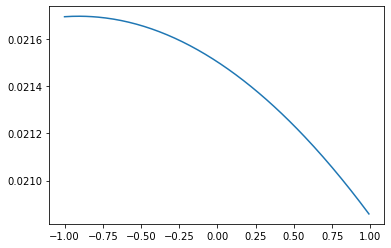

In [50]:
preds=model.predict(np.arange(-1,1,0.01))
plt.plot(np.arange(-1,1,0.01),preds)

### GAN

In [2]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import (BatchNormalization, Conv2D, Conv2DTranspose, Dense, Dropout, Flatten,
                                            LeakyReLU, Reshape)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

import time

#import imageio
import matplotlib.pyplot as plt
import numpy as np


In [3]:
class IsingData:
    def __init__(self, data=None, beta_range=range(11, 30), data_fraction=1.):
        if data is None:
            self.data = [np.load("./8155da59-4af7-4dac-bf73-de0ad9c9b26b/ps11/ising_data/ising_" + str(beta_factor) + ".npy") for beta_factor in beta_range]
            self.data = np.vstack(self.data)
        else:
            self.data = data
        self.data.astype(float)
        (self.x_train, self.x_test) = self.split_data()

        self.get_subset_of_data(data_fraction)
        self.reshape_to_color_channel()

    def reshape_to_color_channel(self):
        self.x_train = self.x_train[:, :, :, np.newaxis]
        self.x_test = self.x_test[:, :, :, np.newaxis]

    def get_subset_of_data(self, data_fraction):
        index = int(len(self.x_train) * data_fraction)
        self.x_train = self.x_train[:index]
        index = int(len(self.x_test) * data_fraction)
        self.x_test = self.x_test[:index]

    def split_data(self):
        return train_test_split(self.data, test_size=0.2)

    def calculate_energy(self):
        gridsize = self.data[0].shape
        energy = np.zeros(np.size(self.data, 0))
        x_size = gridsize[0]
        y_size = gridsize[1]
        for i in range(x_size):
            for j in range(y_size):
                spin = self.data[:, i, j]
                nearest_neighbors = (
                        self.data[:, (i + 1) % x_size, j] + self.data[:, i, (j + 1) % y_size] + self.data[:,
                                                                                                (i - 1) % x_size,
                                                                                                j] + self.data[:, i,
                                                                                                     (j - 1) % y_size])
                energy += -nearest_neighbors * spin
        return energy / 2.

    def calculate_magnetization(self):
        magnetization = np.sum(np.sum(self.data, axis=2), axis=1)
        return magnetization

    def plot_energy(self):
        fig = plt.figure(figsize=(10, 10))
        fig.patch.set_facecolor("white")
        plt.title("Histogram of Energy")
        plt.hist(self.calculate_energy(), density=True)
        plt.show()

    def plot_magnetization(self):
        fig = plt.figure(figsize=(10, 10))
        fig.patch.set_facecolor("white")
        plt.title("Histogram of Magnetization")
        plt.hist(self.calculate_magnetization(), density=True)
        plt.show()


In [33]:
class GAN:
    BUFFER_SIZE = 60000
    BATCH_SIZE = 200

    def __init__(self, data):
        self.noise_dim = 100
        self.train_dataset = tf.data.Dataset.from_tensor_slices(data.x_train).shuffle(self.BUFFER_SIZE).batch(
            self.BATCH_SIZE)
        self.generator = None
        self.discriminator = None
        self.generator_optimizer = None
        self.discriminator_optimizer = None
        # This method returns a helper function to compute cross entropy loss
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

        self.loss_record = np.array([None, None])

    def make_generator_model(self, optimizer=tf.keras.optimizers.Adam(1e-4)):
        self.generator_optimizer = optimizer
        self.generator = Sequential()
        self.generator.add(Dense(10 * 10 * 200, use_bias=False, input_shape=(self.noise_dim,)))
        self.generator.add(BatchNormalization())
        self.generator.add(LeakyReLU())

        self.generator.add(Reshape((10, 10, 200)))

        self.generator.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
        self.generator.add(BatchNormalization())
        self.generator.add(LeakyReLU())

        self.generator.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        self.generator.add(BatchNormalization())
        self.generator.add(LeakyReLU())

        self.generator.add(
            Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
        print(self.generator.summary())

    def make_discriminator_model(self, optimizer=tf.keras.optimizers.Adam(1e-4)):
        self.discriminator_optimizer = optimizer
        self.discriminator = tf.keras.Sequential()
        self.discriminator.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', ))
        self.discriminator.add(LeakyReLU())
        self.discriminator.add(Dropout(0.3))

        self.discriminator.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
        self.discriminator.add(LeakyReLU())
        self.discriminator.add(Dropout(0.3))

        self.discriminator.add(Flatten())
        self.discriminator.add(Dense(1))

    def discriminator_loss(self, real_output, fake_output):
        real_loss = self.cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = self.cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(self, fake_output, images, generated_images, lmbda):
        if images.shape[0] != generated_images.shape[0]:
            generated_images = generated_images[:images.shape[0]]
        l1 = tf.keras.losses.KLDivergence()(generated_images, images)
        l1 =  lmbda * l1
        l2 = self.cross_entropy(tf.ones_like(fake_output), fake_output)
        return tf.keras.backend.sum(l2 + l1)

    def train(self, epochs=20, lmbda=1.):
        for epoch in range(epochs):
            start = time.time()

            for image_batch in self.train_dataset:
                gen_loss, disc_loss = self.train_step(tf.cast(image_batch, float), lmbda)

            print('Time for epoch {} is {} sec'.format(epoch + 1, time.time() - start))
            print('Generation loss: {} Discriminator loss: {} '.format(gen_loss, disc_loss))
            self.loss_record = np.vstack([self.loss_record, np.array([gen_loss, disc_loss])])

        seed = tf.random.normal([16, self.noise_dim])
        self.generate_and_save_images(epochs, seed)

    # This annotation causes the function to be "compiled".
    @tf.function
    def train_step(self, images, lmbda):
        noise = tf.random.normal([self.BATCH_SIZE, self.noise_dim])
        # actually different
        filled_images = images
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = self.generator(noise, training=True)
            real_output = self.discriminator(images, training=True)
            fake_output = self.discriminator(generated_images, training=True)
            gen_loss = self.generator_loss(fake_output, filled_images, generated_images, lmbda)
            disc_loss = self.discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.generator_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(
            zip(gradients_of_discriminator, self.discriminator.trainable_variables))
        return gen_loss, disc_loss

    def generate_and_save_images(self, epoch, test_input, save=True):
        predictions = self.generator(test_input, training=False)

        fig = plt.figure(figsize=(4, 4))

        for i in range(predictions.shape[0]):
            plt.subplot(4, 4, i + 1)
            plt.imshow(predictions[i, :, :, 0], cmap='gray')
            plt.axis('off')
        if save:
            plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
        plt.show()

    def export_predictions(self, num_samples=1000):
        seed = tf.random.normal([num_samples, self.noise_dim])
        predictions = self.generator(seed, training=False)
        predictions = predictions.numpy().reshape(predictions.shape[:-1])
        return IsingData(data=predictions)





In [34]:
ising_data = IsingData(data_fraction = 0.1)
gan = GAN(ising_data)
gan.make_generator_model()
gan.make_discriminator_model()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20000)             2000000   
_________________________________________________________________
batch_normalization_27 (Batc (None, 20000)             80000     
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 20000)             0         
_________________________________________________________________
reshape_9 (Reshape)          (None, 10, 10, 200)       0         
_________________________________________________________________
conv2d_transpose_27 (Conv2DT (None, 10, 10, 128)       640000    
_________________________________________________________________
batch_normalization_28 (Batc (None, 10, 10, 128)       512       
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 10, 10, 128)     

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Time for epoch 1 is 27.054351329803467 sec
Generation loss: 1.1336607933044434 Discriminator loss: 1.1667335033416748 
Time for epoch 2 is 21.838767290115356 sec
Generation loss: 0.7909839153289795 Discriminator loss: 0.9579389691352844 


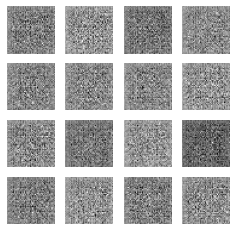

In [35]:
gan.train(2, 0.8)

In [36]:
y_true = [[0, 1], [0, 0]]
y_pred = [[0.6, 0.4], [0.4, 0.6]]
# Using 'auto'/'sum_over_batch_size' reduction type.
tf.keras.losses.KLDivergence()(y_true, y_pred).numpy()



0.45814306

### Permutation anti-symmetric NN

In [93]:
# test
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

In [94]:
inp = Input(shape=2)
x = Lambda(lambda x: x[0] - x[1])(inp)
x = Flatten()(x)
x = Dense(1)(x)

model = Model(inputs=inp, outputs=x)
model.summary()

Model: "functional_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_122 (InputLayer)       [(None, 2)]               0         
_________________________________________________________________
lambda_94 (Lambda)           (2,)                      0         
_________________________________________________________________
flatten_12 (Flatten)         (2, 1)                    0         
_________________________________________________________________
dense_378 (Dense)            (2, 1)                    2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.predict([1,2])

array([[-0.9520248]], dtype=float32)

In [97]:
model.predict([2,1])

array([[0.9520248]], dtype=float32)

### INN

In [76]:
from tensorflow.keras.layers import Dense, Lambda, Multiply, Add, Input
from tensorflow.python.keras import Model
#import tensorflow_probability as tfp


input_shape = 1
reg = 0.01
output_dim = 250


# forward
inp1 = Input(shape=(1,))
inp2 = Input(shape=(1,))
# y1 = x1
y1 = inp1
# y2 = x2 * exp(s(x1)) + t(x1)
# s network
s_layer_1 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(inp1)
s_layer_2 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(s_layer_1)
s_layer_3 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(s_layer_2)
s_layer_4 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(s_layer_3)
s_layer_5 = Dense(input_shape, activation="tanh", kernel_regularizer=regularizers.l2(reg))(s_layer_4)
exp = Lambda(lambda x: tf.math.exp(x))(s_layer_5)
part1 = Multiply()([inp2, exp])

# t network
t_layer_1 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(inp1)
t_layer_2 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(t_layer_1)
t_layer_3 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(t_layer_2)
t_layer_4 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(t_layer_3)
t_layer_5 = Dense(input_shape, activation="linear", kernel_regularizer=regularizers.l2(reg))(t_layer_4)
y2 = Add(name ="add_forward")([part1, t_layer_5])

forward_model = Model(inputs = [inp1, inp2], outputs=[y1,y2], name="forward")
forward_model.summary()

# backward
backward_inp1 = Input(shape=(1,))
backward_inp2 = Input(shape=(1,))
# y1 = x1
x1 = backward_inp1
# y2 = x2 * exp(s(x1)) + t(x1)
# s network
s_layer_1 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="s1")(backward_inp1)
s_layer_2 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="s2")(s_layer_1)
s_layer_3 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="s3")(s_layer_2)
s_layer_4 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="s4")(s_layer_3)
s_layer_5 = Dense(input_shape, activation="tanh", kernel_regularizer=regularizers.l2(reg), name="s5")(s_layer_4)
exp = Lambda(lambda x: tf.math.exp(-x))(s_layer_5)

# t network
t_layer_1 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="t1")(backward_inp1)
t_layer_2 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="t2")(t_layer_1)
t_layer_3 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="t3")(t_layer_2)
t_layer_4 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="t4")(t_layer_3)
t_layer_5 = Dense(input_shape, activation="linear", kernel_regularizer=regularizers.l2(reg), name="t5")(t_layer_4)
t_layer_5 = Lambda(lambda x: -x)(t_layer_5)
part1 = Add(name="add_backwards")([backward_inp2, t_layer_5])
x2 = Multiply()([part1, exp])


backward_model = Model(inputs = [backward_inp1, backward_inp2], outputs=[x1, x2], name="backward")
backward_model.summary()


Model: "forward"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_105 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_348 (Dense)               (None, 250)          500         input_105[0][0]                  
__________________________________________________________________________________________________
dense_349 (Dense)               (None, 250)          62750       dense_348[0][0]                  
__________________________________________________________________________________________________
dense_350 (Dense)               (None, 250)          62750       dense_349[0][0]                  
____________________________________________________________________________________________

In [78]:
# forward and backward together
from tensorflow.keras.layers import Dense, Lambda, Multiply, Add, Input
from tensorflow.python.keras import Model
#import tensorflow_probability as tfp


input_shape = 1
reg = 0.01
output_dim = 250


# forward
inp1 = Input(shape=(1,))
inp2 = Input(shape=(1,))
# y1 = x1
y1 = inp1
# y2 = x2 * exp(s(x1)) + t(x1)
# s network
s_layer_1 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(inp1)
s_layer_2 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(s_layer_1)
s_layer_3 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(s_layer_2)
s_layer_4 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(s_layer_3)
s_layer_5 = Dense(input_shape, activation="tanh", kernel_regularizer=regularizers.l2(reg))(s_layer_4)
exp = Lambda(lambda x: tf.math.exp(x))(s_layer_5)
part1 = Multiply()([inp2, exp])

# t network
t_layer_1 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(inp1)
t_layer_2 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(t_layer_1)
t_layer_3 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(t_layer_2)
t_layer_4 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg))(t_layer_3)
t_layer_5 = Dense(input_shape, activation="linear", kernel_regularizer=regularizers.l2(reg))(t_layer_4)
y2 = Add(name ="add_forward")([part1, t_layer_5])


# backward
# y1 = x1
x1 = y1
# y2 = x2 * exp(s(x1)) + t(x1)
# s network
s_layer_1 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="s1")(y1)
s_layer_2 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="s2")(s_layer_1)
s_layer_3 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="s3")(s_layer_2)
s_layer_4 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="s4")(s_layer_3)
s_layer_5 = Dense(input_shape, activation="tanh", kernel_regularizer=regularizers.l2(reg), name="s5")(s_layer_4)
exp = Lambda(lambda x: tf.math.exp(-x))(s_layer_5)

# t network
t_layer_1 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="t1")(y1)
t_layer_2 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="t2")(t_layer_1)
t_layer_3 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="t3")(t_layer_2)
t_layer_4 = Dense(output_dim, activation="relu", kernel_regularizer=regularizers.l2(reg), name="t4")(t_layer_3)
t_layer_5 = Dense(input_shape, activation="linear", kernel_regularizer=regularizers.l2(reg), name="t5")(t_layer_4)
t_layer_5 = Lambda(lambda x: -x)(t_layer_5)
part1 = Add(name="add_backwards")([y2, t_layer_5])
x2 = Multiply()([part1, exp])


INN_model = Model(inputs = [inp1, inp2], outputs=[x1, x2], name="INN")
INN_model.summary()


Model: "INN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_111 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_368 (Dense)               (None, 250)          500         input_111[0][0]                  
__________________________________________________________________________________________________
dense_369 (Dense)               (None, 250)          62750       dense_368[0][0]                  
__________________________________________________________________________________________________
dense_370 (Dense)               (None, 250)          62750       dense_369[0][0]                  
________________________________________________________________________________________________

# Max Exam
# 5. NN Implementation

In [228]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, Activation, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam

In [229]:
model = Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                           optimizer=Adam(),
                           metrics=['accuracy'])
model.summary()

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_84 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_586 (Dense)            (None, 64)              